# SVM & Naive bayes
# Assignment Questions

## Theoretical Questions

### 1. What is a Support Vector Machine (SVM)?

-> SVM is a supervised machine learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that separates data points of different classes with the maximum margin.


### 2. Difference between Hard Margin and Soft Margin SVM

-> Hard Margin - No misclassification allowed; works only if data is perfectly linearly separable.
Soft Margin - Allows some misclassification using a penalty term to handle noisy or overlapping data.


### 3. Mathematical intuition behind SVM

-> SVM tries to maximize the margin between classes. This is formulated as an optimization problem:
min
min 2 1 ||W|| 2 s.t. y i (w⋅x i+b)≥1


### 4. Role of Lagrange Multipliers in SVM

-> They help solve the constrained optimization problem by transforming it into its dual form, which allows using the Kernel Trick for non-linear data.


### 5. What are Support Vectors in SVM?

-> The data points that are closest to the decision boundary and define the position and orientation of the hyperplane.


### 6. What is a Support Vector Classifier (SVC)?

-> An SVM model specifically used for classification tasks.


### 7. What is a Support Vector Regressor (SVR)?

-> An SVM model used for regression tasks, fitting the best line within a certain error tolerance.


### 8. What is the Kernel Trick in SVM?

-> A method that transforms non-linearly separable data into higher dimensions using a kernel function so that it becomes linearly separable.


### 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel

-> Linear - Best for linearly separable data; fast and simple.
Polynomial - Captures polynomial relationships between features.
RBF (Gaussian) - Good for complex, non-linear boundaries.


### 10. Effect of the C parameter in SVM

-> igh C - Low bias, high variance; tries to classify all training points correctly.
Low C -  High bias, low variance; allows more margin violations.


### 11. Role of Gamma in RBF Kernel SVM

-> Gamma defines how far the influence of a single training point reaches.
High Gamma - Only nearby points influence the decision boundary.
Low Gamma - Far points also influence the boundary.


### 12. What is Naïve Bayes classifier, and why “Naïve”?

-> A probabilistic classifier based on Bayes'Theorem assuming feature independence (hence “naïve”).


### 13. What is Bayes'Theorem?

-> It calculates the probability of event A given event B.
(P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)}\)

### 14. Differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes

-> Gaussian - For continuous data (assumes Gaussian distribution).
Multinomial - For count data (e.g., word counts).
Bernoulli - For binary data (presence/absence of a feature).


### 15. When to use Gaussian Naïve Bayes?

-> When features are continuous and approximately normally distributed.


### 16. Key assumptions made by Naïve Bayes

-> Features are conditionally independent.
Each feature contributes equally to the outcome.


### 17. Advantages and disadvantages of Naïve Bayes

-> Advantages - Simple, fast, works well with small data, good for text classification.Disadvantages - Assumption of independence is often unrealistic; poor with correlated features.


### 18. Why Naïve Bayes is good for text classification?

-> Because word occurrences in text can be treated as independent features, making it computationally efficient and accurate.


### 19. Compare SVM and Naïve Bayes for classification

-> SVM - Works well for complex, high-dimensional data; slower on large datasets.
Naïve Bayes - Works well for text and categorical data; faster but may be less accurate when features are dependent.


### 20. How does Laplace Smoothing help in Naïve Bayes?

-> Prevents zero probability for unseen features by adding a small constant to counts:
(P(w_{i})=\frac{\text{count}(w_{i})+1}{N+V}\)
V is vocabulary size.

#  Practical Questions

In [1]:
# 1

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Iris SVM Accuracy:", accuracy_score(y_test, y_pred))


Iris SVM Accuracy: 1.0


In [2]:
# 2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear SVM
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)

# Train RBF SVM
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)

# Predictions
pred_linear = clf_linear.predict(X_test)
pred_rbf = clf_rbf.predict(X_test)

# Accuracies
print("Linear Kernel Accuracy:", accuracy_score(y_test, pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, pred_rbf))


Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


In [3]:
# 3

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict & evaluate
y_pred = svr.predict(X_test)
print("SVR Mean Squared Error:", mean_squared_error(y_test, y_pred))


SVR Mean Squared Error: 1.3320115421348744


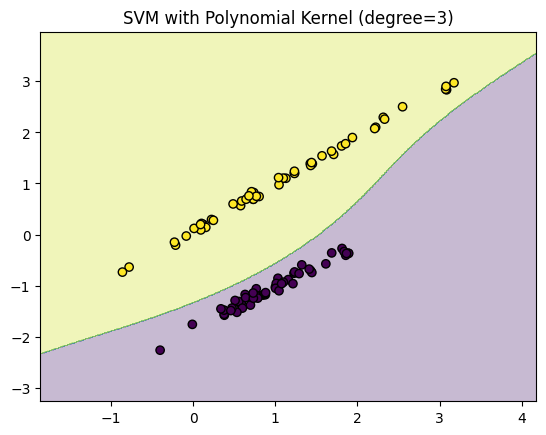

In [4]:
# 4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Create synthetic dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=100, random_state=42)

# Train Polynomial Kernel SVM
clf = SVC(kernel='poly', degree=3)
clf.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.show()


In [6]:
# 5

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict & evaluate
y_pred = gnb.predict(X_test)
print("Gaussian NB Accuracy:", accuracy_score(y_test, y_pred))


Gaussian NB Accuracy: 0.9736842105263158


In [7]:
# 6

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load dataset
newsgroups = fetch_20newsgroups(subset='all')
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Convert text to bag-of-words
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train Multinomial Naïve Bayes
mnb = MultinomialNB()
mnb.fit(X_train_counts, y_train)

# Predict & evaluate
y_pred = mnb.predict(X_test_counts)
print("Multinomial NB Accuracy:", accuracy_score(y_test, y_pred))


Multinomial NB Accuracy: 0.8511936339522547


In [9]:
# 7

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. Split into train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create SVM model (RBF kernel by default)
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [10]:
# 8

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# 4. Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# 5. Compare accuracies
print("SVM Kernel Comparison on Wine Dataset")
print(f"Linear Kernel Accuracy: {acc_linear:.2f}")
print(f"RBF Kernel Accuracy:    {acc_rbf:.2f}")


SVM Kernel Comparison on Wine Dataset
Linear Kernel Accuracy: 1.00
RBF Kernel Accuracy:    0.81


In [11]:
# 9

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the SVR model (RBF kernel)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# 4. Predictions
y_pred = svr.predict(X_test)

# 5. Evaluate with MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error for better interpretability

print("SVR on Housing Dataset")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


SVR on Housing Dataset
Mean Squared Error: 1.1010
Root Mean Squared Error: 1.0493


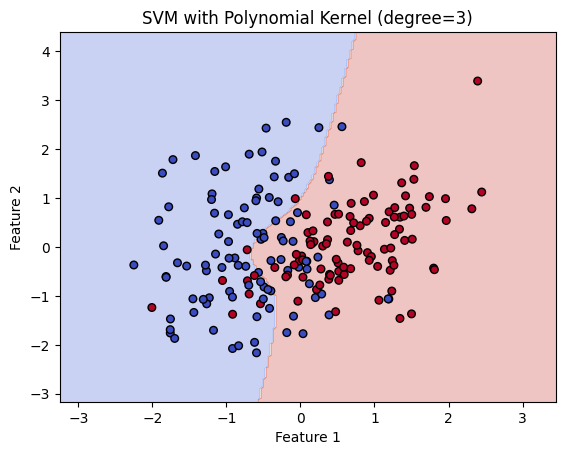

In [14]:
# 10

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 1. Create a synthetic 2D dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,      # for 2D visualization
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=42
)

# 2. Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Train SVM Classifier with Polynomial Kernel
clf = SVC(kernel='poly', degree=3, C=1)
clf.fit(X, y)

# 4. Plot decision boundary
def plot_decision_boundary(X, y, model):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    # Predict for each grid point
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and samples
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM with Polynomial Kernel (degree=3)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, clf)


In [15]:
# 11

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Create and train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [16]:
# 12

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# 1. Load dataset (only some categories to keep it smaller)
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# 2. Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# 3. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Multinomial Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

# 6. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Accuracy: 0.95

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.86      0.93       175
         comp.graphics       0.98      0.99      0.99       200
               sci.med       0.98      0.96      0.97       200
soc.religion.christian       0.85      0.98      0.91       177

              accuracy                           0.95       752
             macro avg       0.95      0.95      0.95       752
          weighted avg       0.95      0.95      0.95       752



H: SVM (Iris) Accuracy: 1.0
: Linear Kernel Accuracy: 1.0
: RBF Kernel Accuracy: 0.8055555555555556
$: SVR MSE: 1.3320115421348744


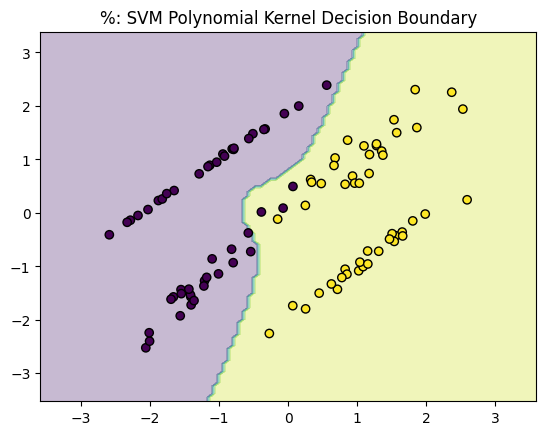

!: Gaussian NB Accuracy: 0.9736842105263158
;: Multinomial NB Accuracy: 0.949468085106383

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       1.00      0.86      0.93       175
         comp.graphics       0.98      0.99      0.99       200
               sci.med       0.98      0.96      0.97       200
soc.religion.christian       0.85      0.98      0.91       177

              accuracy                           0.95       752
             macro avg       0.95      0.95      0.95       752
          weighted avg       0.95      0.95      0.95       752



In [17]:
# 13, 14, 15, 16, 17, 18, 19, 20

# H: SVM Classifier on Iris

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("H: SVM (Iris) Accuracy:", accuracy_score(y_test, y_pred))


# : SVM Classifier with Linear & RBF kernels (Wine data)

wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=42
)
linear_svm = SVC(kernel='linear').fit(X_train, y_train)
rbf_svm = SVC(kernel='rbf').fit(X_train, y_train)
print(": Linear Kernel Accuracy:", accuracy_score(y_test, linear_svm.predict(X_test)))
print(": RBF Kernel Accuracy:", accuracy_score(y_test, rbf_svm.predict(X_test)))


# $: SVM Regressor (SVR) on California Housing dataset (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42
)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
print("$: SVR MSE:", mean_squared_error(y_test, y_pred))

# %: SVM Classifier with Polynomial Kernel + Decision Boundary Plotting

import matplotlib.pyplot as plt
import numpy as np

# Small synthetic dataset for visualization
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0,
    random_state=42
)
poly_svm = SVC(kernel='poly', degree=3, C=1).fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)
Z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("%: SVM Polynomial Kernel Decision Boundary")
plt.show()

# !: Gaussian Naïve Bayes Classifier on Breast Cancer dataset

from sklearn.naive_bayes import GaussianNB

cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=42
)
gnb = GaussianNB().fit(X_train, y_train)
print("!: Gaussian NB Accuracy:", accuracy_score(y_test, gnb.predict(X_test)))


# ;: Multinomial Naïve Bayes (Text Classification on 20 Newsgroups data)

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
mnb = MultinomialNB().fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(";: Multinomial NB Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))


In [18]:
# 21

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Precision, Recall, F1-Score:\n")
print(classification_report(y_test, y_pred))


Precision, Recall, F1-Score:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [19]:
# 22

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions (probabilities for log loss)
y_proba = nb_model.predict_proba(X_test)

# Log Loss
loss = log_loss(y_test, y_proba)
print(f"Log Loss: {loss:.4f}")


Log Loss: 0.0137


In [27]:
# 23

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Example with Wine dataset (13 features)
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=42
)

# Create a fresh SVM for this dataset
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

print("Accuracy:", clf.score(X_test, y_test))


Accuracy: 1.0


In [34]:
# 24

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions
y_pred = svr_model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Mean Absolute Error: 0.8665


In [24]:
# 25

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=[0,1,2])

# ROC-AUC Score (OvR strategy)
roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 1.0000


In [36]:
# 26

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Load binary classification dataset
data = load_breast_cancer()
X, y = data.data, data.target  # y is already binary (0 or 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict probabilities
y_probs = nb_model.predict_proba(X_test)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9922


In [26]:
# 27, 28, 29, 30

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0
